# Save as CSV

In [1]:
import pandas as pd
import numpy as np

In [2]:
basics=pd.read_csv('Data/title_basics.csv.gz')
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020.0,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
3,tt0079644,movie,November 1828,November 1828,0,2001.0,NaN,140,"Drama,War"
4,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
...,...,...,...,...,...,...,...,...,...
143589,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,NaN,51,Drama
143590,tt9916190,movie,Safeguard,Safeguard,0,2020.0,NaN,95,"Action,Adventure,Thriller"
143591,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020.0,NaN,84,Thriller
143592,tt9916362,movie,Coven,Akelarre,0,2020.0,NaN,92,"Drama,History"


# Part 2

In [3]:
import json,os,time
import tmdbsimple as tmdb
from tqdm.notebook import tqdm_notebook
with open('/Users/swaghanaian/secret/tmdb_api.json', 'r') as f:
    login = json.load(f)
    
login.keys()
tmdb.API_KEY = login['api-key']

In [4]:
#saving API call data
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['early_2k_movies.csv',
 'title.ratings.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'title_basics.csv.gz',
 'final_tmdb_data_2000.csv',
 'final_tmdb_data_2001.csv',
 '.ipynb_checkpoints',
 'title.akas.csv.gz']

In [5]:
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [6]:
#defining a list of years
YEARS_TO_GET = [2000,2001]
# defining an errors list
errors = [ ]

In [7]:
def get_movie_with_rating(movie_id):
    # Get the movie object for the current id
    movie = tmdb.Movies(movie_id)
    # save the .info .releases dictionaries
    movie_info = movie.info()
    releases = movie.releases()
    # Loop through countries in releases
    for c in releases['countries']:
        # if the country abbreviation==US
        if c['iso_3166_1' ] =='US':
            ## save a "certification" key in the info dict with the certification
            movie_info['certification'] = c['certification']
    return movie_info

In [8]:
# Start of OUTER loop
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0):
    #Defining the JSON file to store results for year
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    # Check if file exists
    file_exists = os.path.isfile(JSON_FILE)
    # If it does not exist: create it
    if file_exists == False:
    # save an empty dict with just "imdb_id" to the new json file.
        with open(JSON_FILE,'w') as f:
            json.dump([{'tmdb_id':0}],f)
    #Saving new year as the current df
    df = basics.loc[ basics['startYear']==YEAR].copy()
    # saving movie ids to list
    movie_ids = df['tconst'].copy()
    # Load existing data from json into a dataframe called "previous_df"
    previous_df = pd.read_json(JSON_FILE)
    # filter out any ids that are already in the JSON_FILE
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['tmdb_id'])]
    #Get index and movie id from list
    # INNER Loop
    for movie_id in tqdm_notebook(movie_ids_to_get,
                          desc=f'Movies from {YEAR}',
                          position=1,
                          leave=True):
        try:
            # Retrieve then data for the movie id
            temp = get_movie_with_rating(movie_id)  
            # Append/extend results to existing file using a pre-made function
            write_json(temp,JSON_FILE)
            # Short 20 ms sleep to prevent overwhelming server
            time.sleep(0.02)

        except Exception as e:
            #print(e)
            #errors.append([movie_id, e])
    #final_year_df = pd.read_json(JSON_FILE)
    #final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)

YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

Movies from 2000:   0%|          | 0/2717 [00:00<?, ?it/s]

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0102362?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0115937?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0116628?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0118710?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0119966?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0120673?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0137698?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0139159?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0238366?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0238373?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0238413?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0239115?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0239541?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0239804?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0240802?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0240903?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0271811?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0271842?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0272178?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0272217?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0273678?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0273884?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0278080?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0278786?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0360607?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0360773?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0362458?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0362989?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0363573?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0364100?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0371047?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0371100?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0878146?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0899183?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0929287?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0949325?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0953648?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0960720?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0982894?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10168828?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Erro

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14742174?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14760522?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14786900?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14786944?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14786996?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14787010?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14787222?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14787704?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt2552916?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt2556010?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt2602760?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt2646360?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt2665072?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt2668882?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt2669258?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt2727252?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6053814?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6071074?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6231104?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6246780?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6257730?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6362212?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6579448?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6748776?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error

Movies from 2001:   0%|          | 0/2846 [00:00<?, ?it/s]

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0151685?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0160270?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0160480?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0192110?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0193365?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0193537?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0195108?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0197219?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0279620?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0280594?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0280682?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0280883?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0281015?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0282010?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0282220?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0283303?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0298818?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0299745?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0299809?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0300106?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0300361?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0300926?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0301280?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0301326?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0334937?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0336164?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0338568?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0340214?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0342305?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0342795?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0344077?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0344484?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0413795?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0414203?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0415009?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0419436?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0419648?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0421246?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0423083?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0424555?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0830685?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0833481?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0833563?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0836647?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0907891?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0925299?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0929764?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0981025?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14715886?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14716122?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14728330?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14728334?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14728422?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14728444?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14728480?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14729018?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt21856480?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt2207592?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt22080366?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt2210979?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt2228898?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt22471598?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt2268507?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt2275875?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Er

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5579364?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5617222?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5834840?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5974962?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6077268?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6101766?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6103018?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6235936?api_key=eac864efd3579e8edc76ea418c9f22ca
404 Client Error

In [20]:
final_year_df = pd.read_json(JSON_FILE)
final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)

NameError: name 'JSON_FILE' is not defined

In [21]:
#any movie ids that caused an error?
print(f"- Total errors: {len(errors)}")

- Total errors: 0


## Part 2.2

In [9]:
#fetching data
movies_2k = pd.read_csv('Data/final_tmdb_data_2000.csv', low_memory = False)
movies_2k1= pd.read_csv('Data/final_tmdb_data_2001.csv', low_memory = False)

In [10]:
movies_2k.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certifcation
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0116748,0.0,/wr0hTHwkYIRC82MwNbhOvqrw27N.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,5.5,2.0,NaN


## Testing Functions

In [12]:
# Testing function, making sure calls work, and appropriate data extracted.
# summoning The Avengers
get_movie_with_rating('tt0848228')

{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 199.422,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path

In [13]:
movies_2k1.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certifcation
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/ab5yL8zgRotrICzGbEl10z24N71.jpg,NaN,48000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'Italian', 'iso_639_1': 'it'...",Released,If they lived in the same century they'd be pe...,Kate & Leopold,0.0,6.32,1142.0,PG-13
2,tt0079644,0.0,/79axmuH1UGkB7m72jjB9rPff9om.jpg,NaN,0.0,"[{'id': 10752, 'name': 'War'}]",NaN,285529.0,id,November 1828,...,0.0,140.0,"[{'english_name': 'Indonesian', 'iso_639_1': '...",Released,NaN,November 1828,0.0,0.00,0.0,NaN
3,tt0089067,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,210258.0,es,El día de los albañiles 2,...,0.0,90.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,The laborers are back full of love and laughs.,El día de los albañiles 2,0.0,7.20,71.0,NaN
4,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.00,3.0,NaN


In [15]:
# testing function for 2001 movies, ensuring data was properly extracted
# getting The Notebook
get_movie_with_rating('tt0332280')

{'adult': False,
 'backdrop_path': '/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg',
 'belongs_to_collection': None,
 'budget': 29000000,
 'genres': [{'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}],
 'homepage': 'http://www.newline.com/properties/notebookthe.html',
 'id': 11036,
 'imdb_id': 'tt0332280',
 'original_language': 'en',
 'original_title': 'The Notebook',
 'overview': "An epic love story centered around an older man who reads aloud to a woman with Alzheimer's. From a faded notebook, the old man's words bring to life the story about a couple who is separated by World War II, and is then passionately reunited, seven years later, after they have taken different paths.",
 'popularity': 63.765,
 'poster_path': '/rNzQyW4f8B8cQeg7Dgj3n6eT5k9.jpg',
 'production_companies': [{'id': 12,
   'logo_path': '/iaYpEp3LQmb8AfAtmTvpqd4149c.png',
   'name': 'New Line Cinema',
   'origin_country': 'US'},
  {'id': 1565, 'logo_path': None, 'name': 'Avery Pix', 'origin_country': 'US'},
  {'id': 26

In [16]:
#concatinating into a single df
early_2k_movies = pd.concat([movies_2k,movies_2k1])
early_2k_movies.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certifcation
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0116748,0.0,/wr0hTHwkYIRC82MwNbhOvqrw27N.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,5.5,2.0,NaN


In [17]:
# getting info on our new df
early_2k_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4455 entries, 0 to 2261
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                4455 non-null   object 
 1   adult                  4453 non-null   float64
 2   backdrop_path          1935 non-null   object 
 3   belongs_to_collection  248 non-null    object 
 4   budget                 4453 non-null   float64
 5   genres                 4453 non-null   object 
 6   homepage               231 non-null    object 
 7   id                     4453 non-null   float64
 8   original_language      4453 non-null   object 
 9   original_title         4453 non-null   object 
 10  overview               4097 non-null   object 
 11  popularity             4453 non-null   float64
 12  poster_path            3751 non-null   object 
 13  production_companies   4453 non-null   object 
 14  production_countries   4453 non-null   object 
 15  rele

In [18]:
# dropping missing values from certs for visualization purposes
early_2k_movies.dropna(subset = ['certifcation'],inplace = True)
early_2k_movies['certifcation'].isna().sum()

0

In [19]:
# getting keys for search parameters
early_2k_movies.keys()

Index(['imdb_id', 'adult', 'backdrop_path', 'belongs_to_collection', 'budget',
       'genres', 'homepage', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'certifcation'],
      dtype='object')

In [20]:
# How many movies had at least some valid financial information?
financials = early_2k_movies[['budget','revenue']] >= 0
financials.sum()

budget     820
revenue    820
dtype: int64

In [21]:
early_2k_movies['certifcation'].value_counts()

R          464
PG-13      182
NR          72
PG          67
G           26
NC-17        7
Unrated      1
-            1
Name: certifcation, dtype: int64

R          464
PG-13      182
NR          72
PG          67
G           26
NC-17        7
Unrated      1
-            1
Name: certifcation, dtype: int64


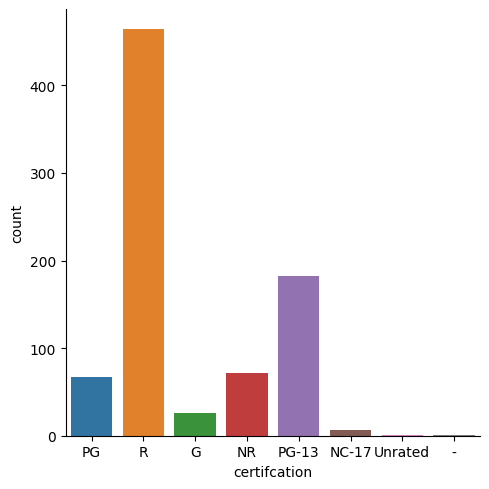

In [23]:
import seaborn as sns
#How many movies are there in each of the certification categories (G/PG/PG-13/R)?
sns.catplot(data = early_2k_movies, x = 'certifcation', kind = 'count');
print(early_2k_movies['certifcation'].value_counts())

In [24]:
#What is the average revenue per certification category?
rev_group = early_2k_movies.groupby(['certifcation'])[['revenue']].mean()
rev_group

,revenue
certifcation,
-,0.000000e+00
G,6.661229e+07
NC-17,1.668286e+03
NR,2.098466e+06
PG,5.868451e+07
PG-13,7.121489e+07
R,1.641628e+07
Unrated,0.000000e+00


<AxesSubplot:xlabel='certifcation', ylabel='revenue'>

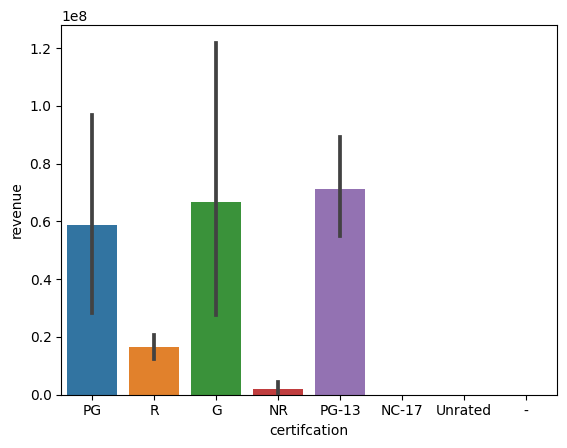

In [26]:
# visualize certification revenue
sns.barplot(data = early_2k_movies, x = 'certifcation', y ='revenue')

In [27]:
# What is the average budget per certification category?
budget_group = early_2k_movies.groupby(['certifcation'])[['budget']].mean()
budget_group

,budget
certifcation,
-,0.000000e+00
G,2.205206e+07
NC-17,0.000000e+00
NR,1.487501e+06
PG,2.349627e+07
PG-13,3.106268e+07
R,9.823285e+06
Unrated,0.000000e+00


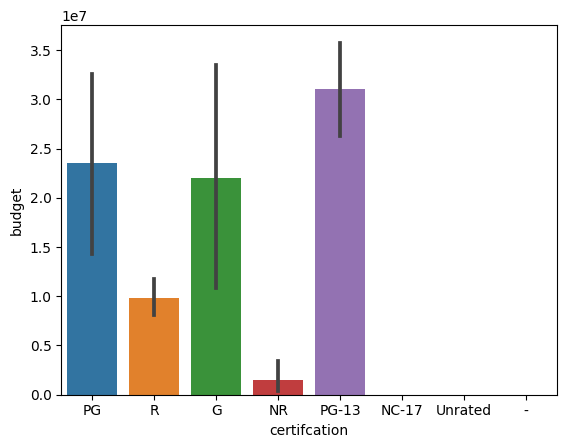

In [28]:
#visualize certification budget
sns.barplot(data = early_2k_movies, x = 'certifcation', y ='budget');

In [30]:
# Saving data to folder for later use
early_2k_movies.to_csv("Data/early_2k_movies.csv.gz",compression='gzip',index=False)